# WiDS Datathon 2023

The purpose of this notebook is to run differnet regressor model experiements on our cleaned data from the preprocessor notebook.
___

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regression Libraries libraries
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn. linear_model import Lasso, LinearRegression

# Other ML Librariesx
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Reading data
___

In [ ]:
# Reading the clean train dataset
# train_df = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv') 
train_df = pd.read_csv("data/clean_train.csv")
print(f'The shape of the dataset is: {train_df.shape}')
train_df.head()

The shape of the dataset is: (375734, 208)


,index,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,...,month,season,week,dayofyear,dayofyear_sin,dayofyear_cos,month_sin,month_cos,season_sin,season_cos
0,0,1.159198,2014-09-01,-0.178921,1.793646,0.558364,1.579199,1.089301,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.578406,-1.230657,-0.692304,-1.410729,0.00238,-1.417124,0.005808
1,1,1.159198,2014-09-02,-0.224783,1.793646,0.552312,1.579199,1.137578,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.587901,-1.242399,-0.670973,-1.410729,0.00238,-1.417124,0.005808
2,2,1.159198,2014-09-03,-0.271269,1.793646,0.534287,1.579199,1.179532,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.597396,-1.253772,-0.649443,-1.410729,0.00238,-1.417124,0.005808
3,3,1.159198,2014-09-04,-0.245280,1.793646,0.513318,1.579199,1.177808,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.606891,-1.264774,-0.627721,-1.410729,0.00238,-1.417124,0.005808
4,4,1.159198,2014-09-05,-0.177562,1.793646,0.491401,1.579199,1.134129,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.616386,-1.275400,-0.605812,-1.410729,0.00238,-1.417124,0.005808


In [ ]:
# Reading the clean test dataset
# test_df = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv') 
test_df = pd.read_csv("data/clean_test.csv")
print(f'The shape of the dataset is: {test_df.shape}')
test_df.head()

The shape of the dataset is: (31354, 207)


,index,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,...,month,season,week,dayofyear,dayofyear_sin,dayofyear_cos,month_sin,month_cos,season_sin,season_cos
0,375734,1.159198,2022-11-01,0.347231,1.59789,0.819078,2.001765,1.044448,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.703886,-1.506288,-2.122550,-1.01653,-1.01653,-1.01653,-1.01653
1,375735,1.159198,2022-11-02,0.302370,1.59789,0.809402,2.001765,1.036774,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.647089,-1.471497,-2.024335,-1.01653,-1.01653,-1.01653,-1.01653
2,375736,1.159198,2022-11-03,0.329714,1.59789,0.787662,2.001765,1.071657,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.590293,-1.435726,-1.927164,-1.01653,-1.01653,-1.01653,-1.01653
3,375737,1.159198,2022-11-04,0.397903,1.59789,0.769890,2.001765,1.033286,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.533497,-1.398988,-1.831065,-1.01653,-1.01653,-1.01653,-1.01653
4,375738,1.159198,2022-11-05,0.496854,1.59789,0.744264,2.001765,0.984449,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.476701,-1.361291,-1.736065,-1.01653,-1.01653,-1.01653,-1.01653


# Modelling

## Splitting the train dataset

In [ ]:
# Select main columns to be used in training
main_cols = train_df.columns.difference(['index', 'contest-tmp2m-14d__tmp2m', 'startdate'])
X = train_df[main_cols]
y = train_df['contest-tmp2m-14d__tmp2m']
test_X = test_df.drop(['index', 'startdate'], axis=1)

print(X.shape)
print(test_X.shape)

(375734, 205)
(31354, 205)


In [ ]:
# Perform first split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, 
                                                              y, 
                                                              test_size=0.2, 
                                                              random_state=42)
print(X_train_temp.shape)
print(X_test.shape)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=42)
print(X_train.shape)
print(X_valid.shape)

(300587, 205)
(75147, 205)
(225440, 205)
(75147, 205)


**Scaling**
<br>
- Before moving on it is key to note that it is crucial to split the data before performing any further transformations such as scaling the data because we want to prevent any information about the test set to spill over into our training and validation set. 
- Data scaling is often done using statistics about the data set as a whole, such as mean and standard deviation. Because we want to be able to measure how well our Machine Learning models perform on data they have never seen before we have to make sure that no information from the test data impacts how the scaling or any other transformation is done.

In [ ]:
# Create the scaler with object range of 0-1
scaler = MinMaxScaler()

# Fit and transform using the training data
scaler.fit_transform(X_train)

# Transform the validation and test features
scaler.transform(X_valid)
scaler.transform(test_X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([[ 0.61362101,  0.56413182,  0.84827846, ...,  0.22782634,
         0.15483636,  0.156576  ],
       [ 0.61362101,  0.54891599,  0.84827846, ...,  0.22782634,
         0.15483636,  0.156576  ],
       [ 0.61362101,  0.5581904 ,  0.84827846, ...,  0.22782634,
         0.15483636,  0.156576  ],
       ...,
       [ 0.64421083, -0.21804863, -0.3144378 , ...,  0.67806202,
         0.79784147,  0.78844544],
       [ 0.64421083, -0.18961677, -0.3144378 , ...,  0.67806202,
         0.79784147,  0.78844544],
       [ 0.64421083, -0.17118389, -0.3144378 , ...,  0.67806202,
         0.79784147,  0.78844544]])

## Training

**Scoring**
<br>
- For regression problems there are many different measures of performance thoough in this competition we will mainly use Root Mean Squared Error as it is the scoring mteric used. We will other metrics to keep track of model performance as well. 
- Additionally, we compute an accuracy of the predictions of the models. Accuracy is typically used as a performance measure in classification problems and not regression problems because it refers to the proportion of correct predictions that the model makes. 
- The way we use accuracy for the regression models in this analysis is different. Accuracy for the regression models is a measure of how far off (in percentage terms) the predicted Temperature will be from the actual Temperature, on average. 

In [ ]:
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('Root Mean Squared Error: {:0.4f}.'.format(rmse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

## Baseline Performance

In [ ]:
# Create list of median predictions that has the same length as y_valid
baseline_y = [y_train.median()] * len(y_valid)

# Compute the relevant scores
base_predictions = baseline_y
base_mae = mean_absolute_error(y_valid, base_predictions)
base_mse = mean_squared_error(y_valid, base_predictions)
base_rmse = np.sqrt(base_mse)
base_r2 = r2_score(y_valid, base_predictions)
base_errors = abs(base_predictions - y_valid)
base_mape = 100 * np.mean(base_errors / y_valid)
base_accuracy = 100 - base_mape

print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(base_mae))
print('Mean Squared Error: {:0.4f}.'.format(base_mse))
print('Root Mean Squared Error: {:0.4f}.'.format(base_rmse))
print('R^2 Score = {:0.4f}.'.format(base_r2))
print('Accuracy = {:0.2f}%.'.format(base_accuracy))

Model Performance
Mean Absolute Error: 8.0773.
Mean Squared Error: 96.4408.
Root Mean Squared Error: 9.8204.
R^2 Score = -0.0018.
Accuracy = -30.32%.


**Observations**
- Both the R-squared and accuracy are negative, which is a strong indication of extremely poor model performance.
- Hopefully our model strongly outperforms this

Before we move on to our model let’s first select the features that we want to use in those models.

## Feature Selection using Lasso Regression

**Exaplanation**
<br>
- Fitting a linear regression minimises a loss function by choosing coefficients for each feature variable. 
- One problem with that is that large coefficients can lead to overfitting, meaning that the model will perform well on the training data but poorly on data it has never seen before. This is where regularisation comes in.
- Lasso Regression is a type of regularisation regression that penalises the absolute size of the regression coefficients through an additional term in the loss function.

Text(0, 0.5, 'Coefficients')

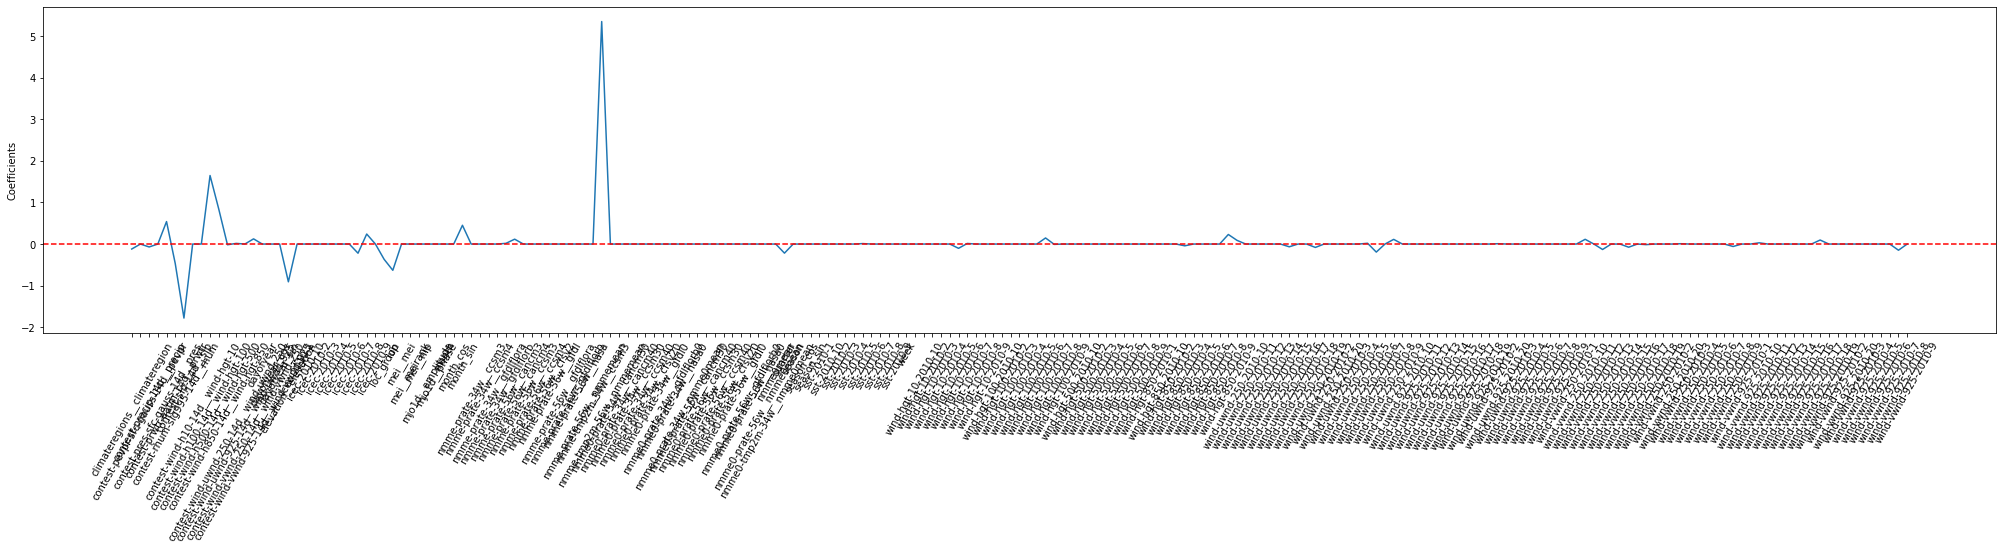

In [ ]:
# Create the model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Extract the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.figure(figsize=(35, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')

**Observations**
<br>
- Coefficients that are zero indicate that the corresponding feature is not important: When the Lasso algorithm shrinks the coefficient of a feature to zero, it effectively removes that feature from the model. 
- This means that features with coefficients of zero can be safely ignored, as they are not contributing to the model.

In [ ]:
# Get an array of the column names where the coefficient is equal to zero
zero_coef = np.abs(lasso.coef_) == 0
zero_coef_cols = np.array(list(X.columns))[zero_coef]

print(len(zero_coef_cols))
print(zero_coef_cols)

162
['contest-pevpr-sfc-gauss-14d__pevpr' 'contest-pres-sfc-gauss-14d__pres'
 'contest-wind-h10-14d__wind-hgt-10' 'contest-wind-h100-14d__wind-hgt-100'
 'contest-wind-vwnd-250-14d__wind-vwnd-250' 'dayofyear' 'dayofyear_cos'
 'dayofyear_sin' 'icec-2010-1' 'icec-2010-10' 'icec-2010-2' 'icec-2010-3'
 'icec-2010-4' 'icec-2010-5' 'icec-2010-6' 'icec-2010-9' 'mei__mei'
 'mei__meirank' 'mei__nip' 'mjo1d__amplitude' 'mjo1d__phase' 'month'
 'month_cos' 'nmme-prate-34w__ccsm3' 'nmme-prate-34w__ccsm4'
 'nmme-prate-34w__gfdlflora' 'nmme-prate-34w__gfdlflorb'
 'nmme-prate-56w__ccsm3' 'nmme-prate-56w__ccsm4' 'nmme-prate-56w__cfsv2'
 'nmme-prate-56w__gfdl' 'nmme-prate-56w__gfdlflora'
 'nmme-prate-56w__gfdlflorb' 'nmme-prate-56w__nasa'
 'nmme-prate-56w__nmmemean' 'nmme-tmp2m-34w__ccsm3'
 'nmme0-prate-34w__cancm30' 'nmme0-prate-34w__cancm40'
 'nmme0-prate-34w__ccsm30' 'nmme0-prate-34w__ccsm40'
 'nmme0-prate-34w__cfsv20' 'nmme0-prate-34w__gfdl0'
 'nmme0-prate-34w__gfdlflorb0' 'nmme0-prate-34w__nasa0'
 '

In [ ]:
# Drop these columns from training, validation and test data
X_train.drop(columns=zero_coef_cols, inplace=True)
X_train_temp.drop(columns=zero_coef_cols, inplace=True)
X_valid.drop(columns=zero_coef_cols, inplace=True)
test_X.drop(columns=zero_coef_cols, inplace=True)

print(X_train.shape)
print(X_train_temp.shape)
print(X_valid.shape)
print(test_X.shape)

(225440, 43)
(300587, 43)
(75147, 43)
(31354, 43)


## Different Baseline Regressor Models

### Multiple Linear Regression (MLR)

In [ ]:
# Create regressor
lr_regressor = LinearRegression()

# Fit MLR model to training data
mlr = lr_regressor.fit(X_train, y_train)

# Evaluate the performance
scoring(mlr, X_valid, y_valid)

Model Performance
Mean Absolute Error: 1.4538.
Mean Squared Error: 3.5132.
Root Mean Squared Error: 1.8744.
R^2 Score = 0.9635.
Accuracy = 72.78%.


In [ ]:
coef_dict = dict(zip(X.columns, mlr.coef_))

# Print the coefficient values for each feature
for feature, coef in coef_dict.items():
    print(f"{feature}: ---------------------------- {coef}")

climateregions__climateregion: ---------------------------- -0.19072769067496093
contest-pevpr-sfc-gauss-14d__pevpr: ---------------------------- -0.27378072672352527
contest-precip-14d__precip: ---------------------------- 0.7721794271881234
contest-pres-sfc-gauss-14d__pres: ---------------------------- -0.6936991310685575
contest-prwtr-eatm-14d__prwtr: ---------------------------- -1.8598040351760725
contest-rhum-sig995-14d__rhum: ---------------------------- 1.2416031656844797
contest-slp-14d__slp: ---------------------------- 1.0572345811192796
contest-wind-h10-14d__wind-hgt-10: ---------------------------- -0.17673032185117576
contest-wind-h100-14d__wind-hgt-100: ---------------------------- 0.32882446442764945
contest-wind-h500-14d__wind-hgt-500: ---------------------------- 0.20773068600093253
contest-wind-h850-14d__wind-hgt-850: ---------------------------- -0.945250950933329
contest-wind-uwnd-250-14d__wind-uwnd-250: ---------------------------- -0.35238638600026667
contest-win

**Obseravations**
- All performance measures are substantially better than those of the baseline model (THANK GOD!). 
-The competition scoring metric is RMSE, a value of 1.8744 is decent, but let’s see if we can do better by using different models.

### Extreme Gradient Boosting Regressor

In [ ]:
# Create regressor
xgb_regressor = XGBRegressor(random_state=42)

# Fit model to training data
xgb = xgb_regressor.fit(X_train, y_train)

# Evaluate the performance
scoring(xgb, X_valid, y_valid)

[12:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Random Forest Regressor

In [ ]:
# Create regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit RF model to training data
rf = rf_regressor.fit(X_train, y_train)

# Evaluate the performance
scoring(rf, X_valid, y_valid)

Model Performance
Mean Absolute Error: 0.4054.
Mean Squared Error: 0.3302.
Root Mean Squared Error: 0.5746.
R^2 Score = 0.9966.
Accuracy = 90.47%.


**Observations**
___
🏁🏁 **RMSE ScoreBoard** 🏁🏁
1. Random Forest :
2. Linear Regressor :
3. XGB Regressor : 
___

🏁🏁 **Accuracy ScoreBoard** 🏁🏁
1. Random Forest :
2. Linear Regressor :
3. XGB Regressor : 
___

- Clearly our winner here is the Random Forest Regressor model
- Let's improve our baseline models to see if it still stays on top!

## Improving Our Regressor Models

### Cross Validation

- We're going to use 4-fold Cross-Validation and compare the three models used so far: Multiple Linear Regression, Random Forest and Extreme Gradient Boosting Regressor.
- Note that a 4-fold CV also nicely compares to the training and validation split from above because we split the data into 75% training and 25% validation data.
- We have created a function that takes as inputs a list of models that we would like to compare, the feature data, the target variable data and how many folds we would like to create. 
- The function computes the performance measures we used previously and returns a table with the averages for all models as well as the scores for each type of measure per fold, in case we would like to investigate further. Here is the function:

In [ ]:
# Define a function that compares the CV perfromance of a set of predetrmined models 
model_names = ['mlr_reg', 'xgb_reg', 'rf_reg']
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    rmses = []
    accs = []
    count = 0
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        print(f"---------------------------- {model_names[count]}: ----------------------------")
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)

        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)

        rmse = np.sqrt(mse)
        rmses.append(rmse)
        rmse_avg = round(rmse.mean(), 4)
        print('RMSEs')
        print(rmses)

        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        print('Accuracys')
        print(accs)

        cv_accuracies[str(model)] = [rmse_avg, acc_avg]
        count  = count + 1

    cv_accuracies.index = ['Root Mean Squared Error', 'Accuracy']
    return cv_accuracies, rmses, accs

In [ ]:
# # Create the models to be tested
# mlr_reg = LinearRegression()
# rf_reg = _reg = xgb_regressor = XGBRegressor(random_state=42)

# # Put the models in a list to be used for Cross-Validation
# models = [mlr_reg, xgb_reg, rf_reg]
RandomForestRegressor(random_state=42)
# xgb
# # Run the Cross-Validation comparison with the models used in this analysis
# comp, rmses, accs = cv_comparison(models, X_train_temp, y_train_temp, 4)

To understand why the Cross-Validation results in different scores than the simple training and validation split we did eariler, we need to have a closer look at how the models perform on each fold. 

In [ ]:
# # Create DataFrame for all RMSEs
# rmse_comp = pd.DataFrame(rmses, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
#                                                          '4th Fold'])

# # Add a column for the averages
# rmse_comp['Average'] = np.round(rmse_comp.mean(axis=1),4)

In [ ]:
# # Create DataFrame for all Accuracys
# acc_comp = pd.DataFrame(accs, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
#                                                          '4th Fold'])

# # Add a column for the averages
# acc_comp['Average'] = np.round(acc_comp.mean(axis=1),4)

### Hyper Parameter Tuning

#### Random Forest Tuning

In [ ]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

In [ ]:
# Create the model to be tuned
rf_base = RandomForestRegressor()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_temp, y_train_temp)

# View the best parameters from the random search
rf_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


#### XGBRegressor Tuning

In [ ]:
# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

# Minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

In [ ]:
# Create the model to be tuned
xgb_base = XGBRegressor()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 200, cv = 3, verbose = 2, 
                                random_state = 420, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train_temp, y_train_temp)

# Get the optimal parameters
xgb_random.best_params_

## Final Model Training

In [ ]:
# Create the final Multiple Linear Regression
mlr_final = LinearRegression()

# Train the models using 80% of the original data
mlr_final.fit(X_train_temp, y_train_temp)

In [ ]:
# Create the final Random Forest
rf_final = RandomForestRegressor(n_estimators = 200,
                                 min_samples_split = 6,
                                 min_impurity_decrease = 0.0,
                                 max_features = 'sqrt',
                                 max_depth = 25,
                                 criterion = 'mae',
                                 bootstrap = True,
                                 random_state = 42)

# Train the models using 80% of the original data
rf_final.fit(X_train_temp, y_train_temp)

In [ ]:
# Create the fnal Extreme Gradient Booster
xgb_final = XGBRegressor(tree_method = 'exact',
                         objective = 'reg:squarederror',
                         n_estimators = 1600,
                         min_child_weight = 6,
                         max_depth = 8,
                         gamma = 0,
                         eta = 0.1,
                         random_state = 42)

# Train the models using 80% of the original data
xgb_final.fit(X_train_temp, y_train_temp)

In [ ]:
# Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        rmse = np.qrt(mse)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, rmse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [ ]:
# Call the comparison function with the three final models
final_scores = final_comparison([mlr_final, rf_final, xgb_final], X_test, y_test)

# Adjust the column headers
final_scores.columns  = ['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']

# Predictions on the test data

In [ ]:
# submission = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv') 
submission = pd.read_csv('data/sample_solution.csv')
submission.head()

We now make submission files with each of our models to see how well each does on the test dataset

In [ ]:
# mlr submission
submission_mlr = submission.copy()
submission_mlr["target"] = mlr_final.predict(test_X)
submission_mlr

In [ ]:
submission_mlr.to_csv('submission_mlr.csv', index = False) 

In [ ]:
# xgb susbmission
submission_xgb = submission.copy()
submission_xgb["target"] = xgb_final.predict(test_X)
submission_xgb

In [ ]:
submission_xgb.to_csv('submission_xgb.csv', index = False) 

In [ ]:
# rf subsmission
submission_rf = submission.copy()
submission_rf["target"] = rf_final.predict(test_X)
submission_rf

In [ ]:
submission_rf.to_csv('submission_rf.csv', index = False) 

# Resources
- [Part 2 : Using Machine Learning to Predict Fitbit Sleep Scores](https://towardsdatascience.com/using-machine-learning-to-predict-fitbit-sleep-scores-496a7d9ec48)
- [Part 3 : Cross-Validation and Hyperparameter Tuning: How to Optimise your Machine Learning Model](https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d)